# **Exemplos de aplicações da grade BR-DWGD com auxílio da linguagem Python**

**Apresentação para o Programa de Pós-Graduação em Meteorologia (PPGMet) da Universidade Federal de Santa Maria, RS (17/04/2023)**

Autor: Alexandre Cândido Xavier, do Dep. de Engenharia Rural da UFES.


* **Trabalhos dos dados**

  * Xavier, A. C., Scanlon, B. R., King, C. W., & Alves, A. I. (2022). New improved Brazilian    daily weather gridded data (1961–2020). International Journal of Climatology, 42( 16), 8390– 8404. https://doi.org/10.1002/joc.7731

  * Xavier, A.C., King, C.W. and Scanlon, B.R. (2016), Daily gridded meteorological variables in Brazil (1980–2013). *International Journal of Climatology*, 36: 2644-2659. https://doi.org/10.1002/joc.4518

* **Baixar esta apresentação, sistema Ubuntu** 

$wget https://github.com/AlexandreCandidoXavier/BR-DWGD/blob/main/exemplos/apresentacao_UFSM.ipynb

* **Informações da grade [aqui](https://sites.google.com/site/alexandrecandidoxavierufes/brazilian-daily-weather-gridded-data?authuser=0)**

* **Para download dos arquivos NetCDF [aqui](https://drive.google.com/drive/u/1/folders/11-qnvwojirAtaQxSE03N0_SUrbcsz44N)**

* **Códigos em arquivos ".py" e mais exemplo [aqui](https://github.com/AlexandreCandidoXavier/BR-DWGD)**


# **Informações Gerais do ambiente de apresentação**

* Estes códigos estão sendo rodados em Python 3.10 no ambiente [JupyterLab](https://jupyter.org/)
* Abaixo estão as versões das principais bibliotecas.
  * **[Numpy](https://numpy.org/)**:  1.21.5
  * **[Xarray](https://docs.xarray.dev/en/stable/)**:  2023.3.0
  * **[Pandas](https://pandas.pydata.org/)**:  1.5.2
  * **[Matiplotlib](https://matplotlib.org/)**: 3.5.1
  * **[Cartopy](https://scitools.org.uk/cartopy/docs/latest/)**:  0.21.1
  * **[Bokeh](https://bokeh.org/)**:  3.1.0
  * **[Seaborn](https://seaborn.pydata.org/)**:  0.12.2


* [Aqui](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/) você pode encontrar instruções para instalar as bibliotecas no JupyterLab.
* Para instalar a biblioteca *Xarray* adequadamente, ver https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
* Para aqueles com dificuldade de instalação, ver a plataforma [Anaconda](https://www.anaconda.com/products/distribution)

## Lendo bibliotecas

In [1]:
# para instalar:
# import sys
# !{sys.executable} -m pip install ipympl
import matplotlib
import glob
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
from cartopy.feature import NaturalEarthFeature, BORDERS
import cartopy.crs as ccrs
import pdb
import seaborn as sns
from scipy import stats
import bokeh
from bokeh.plotting import figure, output_file, show, ColumnDataSource, save
from bokeh.models import LinearColorMapper, ColorBar
from bokeh.io import output_notebook
from bokeh.transform import transform
import geopandas as gpd

output_notebook()

Loading BokehJS ...

In [2]:
print("Versões:")
print("Numpy: ", np.__version__)
print("Xarray: ", xr.__version__)
print("Pandas: ", pd.__version__)
print("Cartopy: ", cartopy.__version__)
print("Bokeh: ", bokeh.__version__)
print("Seaborn: ", sns.__version__)
print("Matplotlib: ", matplotlib.__version__)

Versões:
Numpy:  1.21.5
Xarray:  2023.3.0
Pandas:  1.5.2
Cartopy:  0.21.1
Bokeh:  2.4.3
Seaborn:  0.12.2
Matplotlib:  3.5.1


# **Dados observados**

Dados observados utilizados para gerar as grades do *paper* Xavier et al. (2022).

Para download: [aqui](https://drive.google.com/drive/u/1/folders/1urYczkKxBcXWHAmx04lle6jcbiTQS-bR)

## Funções plotar limites do Brasil, dos estados, ou das bacias

Arquivos shape se encontam em:
https://github.com/AlexandreCandidoXavier/BR-DWGD/tree/main/exemplos/shape_file

São eles:
* "BR_Contorno.shp", limite do Brasil
* "BRASIL.shp", limites estaduais
* "GEOFT_DNAEE_BACIA.shp", limites das grandes bacias

In [4]:
# colocar nome do shape: "BRASIL.shp", "GEOFT_DNAEE_BACIA.shp" ou "BR_Contorno.shp"
name_shape = "BRASIL.shp" 

# definir caminho dos arquivos shapes
path_shape = '/home/alexandre/Dropbox/grade_2020/examples/BR-DWGD/exemplos/shape_file/'

# lendo arquivo shape
gdf = gpd.GeoDataFrame.from_file(path_shape + name_shape)   
gdf = gdf.explode(index_parts=True)
gdf_geom = gdf["geometry"].apply(lambda p: list(p.exterior.coords)).explode().apply(pd.Series).rename(columns=({0:"x", 1:"y"}))    

gdf_geom = gdf_geom
gdf_geom["n_geometry"] = gdf_geom.index

x, y = [], []
for geometry in np.unique(gdf_geom["n_geometry"]):
    x.append(gdf_geom.loc[gdf_geom["n_geometry"] == geometry, 'x'].tolist())
    y.append(gdf_geom.loc[gdf_geom["n_geometry"] == geometry, 'y'].tolist())

# função para plotar no Bokeh
def limite2plot_bokeh(p):
    return p.multi_line(x,y, line_color = "black", line_width = 1)

# função para Matplotlib
def limite2plot_plt(ax):
    # _, ax = plt.subplots()
    # limite2plot_plt(ax)
    for geometry in np.unique(gdf_geom["n_geometry"]):
        x = gdf_geom.loc[gdf_geom["n_geometry"] == geometry, 'x']
        y = gdf_geom.loc[gdf_geom["n_geometry"] == geometry, 'y']
        ax.plot(x, y, "gray", linewidth=0.7)
    
p = figure(title = name_shape)
# p.multi_line(x,y, line_color = "green", line_width = 0.5)
limite2plot_bokeh(p)
show(p)

In [5]:
# caminho dos dados observados
obs_path = '/home/alexandre/Dropbox/grade_2020/data/netcdf_files/observed_data/'

pd.DataFrame([file.split("/")[-1] for file in glob.glob(obs_path + "*.npz")])

0
0    u2.npz
1  Tmax.npz
2    pr.npz
3    Rs.npz
4  Tmin.npz

## Lendo dados observados

Escolhendo a variável a ser analisada

In [6]:
# Definindo variável
var_name = "Rs"
npzfile = np.load(obs_path + var_name + '.npz')
print(obs_path + var_name + '.npz')

# definindo os dias dos dados 
days = pd.date_range("1961-01-01", "2020-07-31")

# variáveis dentro do arquivo
print("Variáveis: ", npzfile.files)

# criando um dataframe
obs = npzfile["data"]
latlon = npzfile["lat_lon_alt"]
ID = npzfile["id"]
   
df = pd.DataFrame(latlon, columns=["lat","lon", "alt"], index=ID)
df.head()

/home/alexandre/Dropbox/grade_2020/data/netcdf_files/observed_data/Rs.npz
Variáveis:  ['data', 'lat_lon_alt', 'name_code', 'id']


lat        lon     alt
A001 -15.789343 -47.925755  1101.0
A002 -16.642841 -49.220222   737.0
A003 -17.745066 -49.101700   782.0
A005 -13.309528 -49.117477   354.0
A009 -10.190744 -48.301811   237.0

## Plotando todas as estações/pluviômetros

In [8]:
# organizando dados para o Bokeh
data = {"x": df["lon"].values.tolist(), 
        "y": df["lat"].values.tolist(), 
        "ID": df.index.values.tolist(), 
        "row": [n for n in range(len(df))],
        "alt": df["alt"].values.tolist()}

source = ColumnDataSource(data=data)
TOOLTIPS = [
    ("ID:", "@ID"),
    ("linha", "@row"),
    ("(lat,lon,alt)", "($y°, $x°, @alt m)"),
]
p = figure(title="Estações " + var_name, width=400, height=400, tooltips=TOOLTIPS)
p.circle(x="x", y="y", source=source, size=5, color="navy", alpha=0.5, )
limite2plot_bokeh(p)
show(p)

## Plotando dados observados de um estação

In [9]:
estacao_id = "A117" #"83994"

estacao = df.index == estacao_id 

if ~np.any(estacao):
    print(f"não tem estacão/pluviômetro {estacao_id}")
    
source = ColumnDataSource({"x": days,
                           "y": obs[:,estacao]})
TOOLTIPS = [ ("valor obs:", "($y)")]

p = figure(title=f"{var_name} - esta. ID: {estacao_id}", 
           width=600, height=300, 
           x_axis_type='datetime', tooltips=TOOLTIPS)
p.line("x", "y", source=source)
show(p)

## Plotando dados Observados de um dia

In [10]:
# escolha o dia
dia = '1979-01-02'

dia_index = (days == dia)
index = ~np.isnan(obs[dia_index, :]).flatten()
source = ColumnDataSource({
    "x":latlon[index, 1], "y":latlon[index, 0], 
    "c":obs[dia_index, index], "alt":latlon[index, 2], "ID": ID[index],
})
color = LinearColorMapper(palette = 'Viridis256',
                          low = obs[dia_index, index].min(),
                          high = obs[dia_index, index].max())

TOOLTIPS = [
    ("ID", "@ID"),
    ("(lat,lon,alt)", "($y°, $x°, @alt m)"),
    ("valor obs:", "@c"),
]

p = figure(title=var_name + " - dia: " + str(days[dia_index].values[0])[:10], 
           width=400, height=400, tooltips=TOOLTIPS)
p.circle("x", "y", size=5, color = transform('c', color), 
         alpha=0.9, source=source)
limite2plot_bokeh(p)

show(p)

Salvando html

In [11]:
# output_file("lixo.html", mode='inline')
# save(p)

# **Trabalhando com dados da grade (NetCDF)**

Indicar o caminho onde os arquivos estão armazenados ([download aqui](https://drive.google.com/drive/u/1/folders/11-qnvwojirAtaQxSE03N0_SUrbcsz44N))

In [12]:
path_var =  '/home/alexandre/Dropbox/grade_2020/data/netcdf_files/'
path_control = '/home/alexandre/Dropbox/grade_2020/data/netcdf_files/Controls/'

print("Arquivos:")
nc_files = pd.DataFrame([file.split("/")[-1] for file in glob.glob(path_var + "*.nc")])
nc_files

Arquivos:


0
0   RH_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
1   Tmin_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3...
2   RH_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
3   ETo_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3....
4   pr_20200801_20221231_BR-DWGD_UFES_UTEXAS_v_3.1.nc
5   pr_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
6   ETo_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3....
7   pr_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3.1.nc
8   Rs_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
9   Tmax_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3...
10  u2_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
11  RH_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3.0.nc
12  Rs_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3.0.nc
13  Rs_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
14  ETo_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3....
15  Tmax_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3...
16  u2_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
17  pr_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3.0.nc
18  Tmin_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3...
19  Tmax_19610101_19801231_BR-DWGD_UFES_UTEXAS_v_3...
20  Tmin_19810101_20001231_BR-DWGD_UFES_UTEXAS_v_3...
21  u2_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3.0.nc

## Plotando dados e controles para todo Brasil em um dia

Todos os arquivos da variável escolhida são necessários, ou seja, os de controle também.

Pegando a variável e controles

In [13]:
# Defina variável
name_var = 'Rs'

# lendo variável
var_xr = xr.open_mfdataset(path_var + name_var + '*.nc')
var_control = xr.open_mfdataset(path_control + name_var + '*.nc')

var = var_xr[name_var]
var_count = var_control['count']
var_dist_nearest = var_control['dist_nearest']

In [14]:
var_xr

<xarray.Dataset>
Dimensions:    (time: 21762, latitude: 393, longitude: 391)
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01 1961-01-02 ... 2020-07-31
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
Data variables:
    Rs         (time, latitude, longitude) float32 dask.array<chunksize=(7305, 393, 391), meta=np.ndarray>
Attributes:
    title:                Brazilian Daily Weather Gridded Data (1961-2020)
    institution:          Federal University of Espirito Santo; University of...
    institution_id:       UFES; UTEXAS
    history:              Created Tue May 31 11:19:49 2022
    temporal_resolution:  24-hourly
    contact:              alexandre.xavier@ufes.br; careyking@energy.utexas.e...
    main_code:            gerando_ncfiles_Rs.py
    update_information:   https://sites.google.com/site/alexandrecandidoxavie...
    main_paper:           Xavier, A.C., Scanlon, B.R., King, C.W. and Alves, ...
    Interpolate_method:   ADW, power: 5; n_neighbor: 5; variation_with_height...

Escolhando o dia a ser plotando

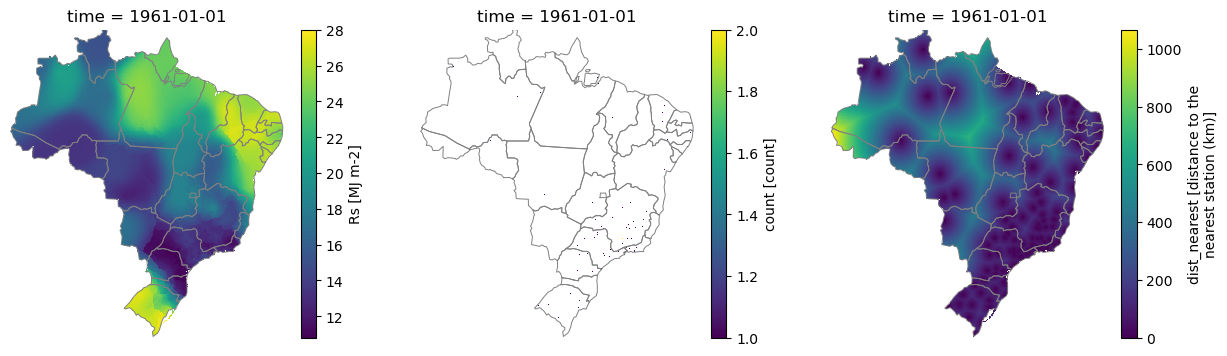

In [16]:
# dia para plota
day2get = '1961-01-01'

# plotando
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

# plotando varíavel no dia
var.sel(time=day2get).plot(ax=ax1), ax1.axis('off')
limite2plot_plt(ax1)

# plotando número de estações dentro da célula no dia
mask = var_count.sel(time=day2get) != 0
var_count.sel(time=day2get).where(mask).plot(ax=ax2), ax2.axis('off')
limite2plot_plt(ax2)

# plotando distância da célula à estação mais próxima
var_dist_nearest.sel(time=day2get).plot(ax=ax3), ax3.axis('off')
limite2plot_plt(ax3)

# para gravar
plt.savefig("para_teste_UFSM.jpeg")

## Extraindo dados para uma posição

* Extraindo para uma posição a série histórica diária da temperatura máxima (Tmax)
* calculando a sua media mensal (01/01/1961-12/2010) e;
* exportando dados diarios em arquivo cvs:

In [17]:
# lendo Tmax
ds = xr.open_mfdataset(path_var + 'Tmax*.nc')["Tmax"]
ds

<xarray.DataArray 'Tmax' (time: 21762, latitude: 393, longitude: 391)>
dask.array<concatenate, shape=(21762, 393, 391), dtype=float32, chunksize=(7305, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01 1961-01-02 ... 2020-07-31
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
Attributes:
    units:          Celcius degrees
    standard_name:  Tmax
    _ChunkSizes:    [7305  393  391]

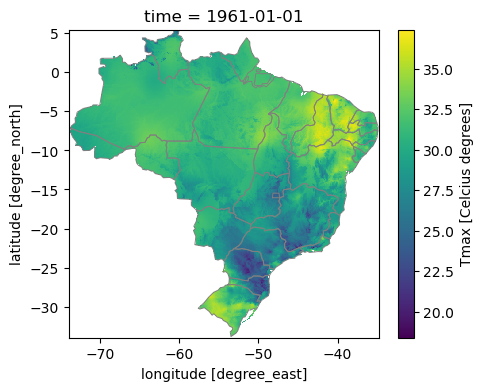

In [19]:
# plotando um dia qualquer
_, ax1 = plt.subplots(1, 1, figsize=(5, 4))
ds.sel(time="1961-01-01").plot(ax=ax1)
limite2plot_plt(ax1)


Definindo o período

In [20]:
start_date, end_date = '1961-01-01','2019-12-31'
Tmax_data = ds.sel(time=slice(start_date, end_date))
# Tmax_data

Pegando os dados para a posição de Umuarama/Paraná (lat-23.76,lon=-53.30)

In [21]:
lat, lon = -23.76, -53.30
Tmax_data_temporal = Tmax_data.sel(latitude=lat,longitude=lon, method='nearest')
Tmax_data_temporal

<xarray.DataArray 'Tmax' (time: 21549)>
dask.array<getitem, shape=(21549,), dtype=float32, chunksize=(7305,), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1961-01-01 1961-01-02 ... 2019-12-31
    latitude   float32 -23.75
    longitude  float32 -53.25
Attributes:
    units:          Celcius degrees
    standard_name:  Tmax
    _ChunkSizes:    [7305  393  391]

Plotando dados diários e mensais para o posição

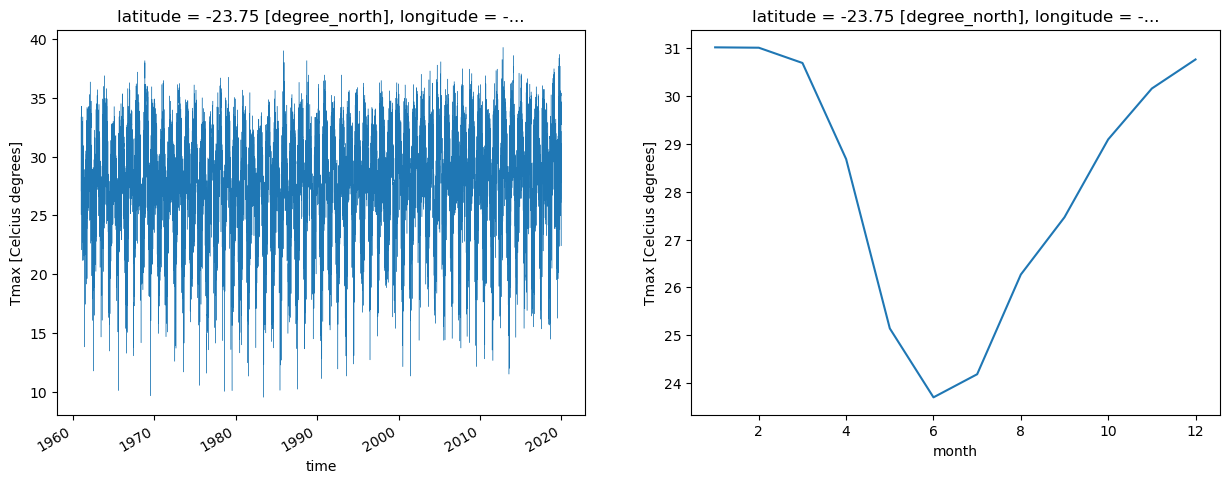

In [25]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# plotando a diaria
Tmax_data_temporal.plot(ax=ax1, linewidth=.3)

# plotando a media mensal
Tmax_mean_month = Tmax_data_temporal.groupby('time.month').mean('time')
Tmax_mean_month.plot(ax=ax2)

Exportando dados diarios em cvs: nome do arquivo 'Tmax.cvs'

In [26]:
fileName = 'Tmax.csv'
days = np.array(Tmax_data_temporal.time)
data_dataframe = pd.DataFrame(np.array(Tmax_data_temporal), index=days)
data_dataframe.to_csv(fileName, float_format='%.1f')

In [27]:
data_dataframe

0
1961-01-01  25.078125
1961-01-02  31.203125
1961-01-03  33.343750
1961-01-04  33.375000
1961-01-05  31.734375
...               ...
2019-12-27  34.343750
2019-12-28  32.687500
2019-12-29  34.781250
2019-12-30  35.406250
2019-12-31  35.156250

[21549 rows x 1 columns]

## Plotando média mensal da Umidade Relativa, todo Brasil

Pegando RH para o periodo e calculando a media mensal

In [28]:
ds = xr.open_mfdataset(path_var + 'RH*.nc')

# definindo período a ser avaliado
start_date, end_date = '1990-01-01', '1999-12-31'
RH_data = ds.RH.sel(time=slice(start_date, end_date))

# agrupando em media mensal
RH_mean_month = RH_data.groupby('time.month').mean('time')
RH_mean_month

<xarray.DataArray 'RH' (month: 12, latitude: 393, longitude: 391)>
dask.array<stack, shape=(12, 393, 391), dtype=float32, chunksize=(1, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:          %
    standard_name:  RH
    _ChunkSizes:    [7305  393  391]

Plotando

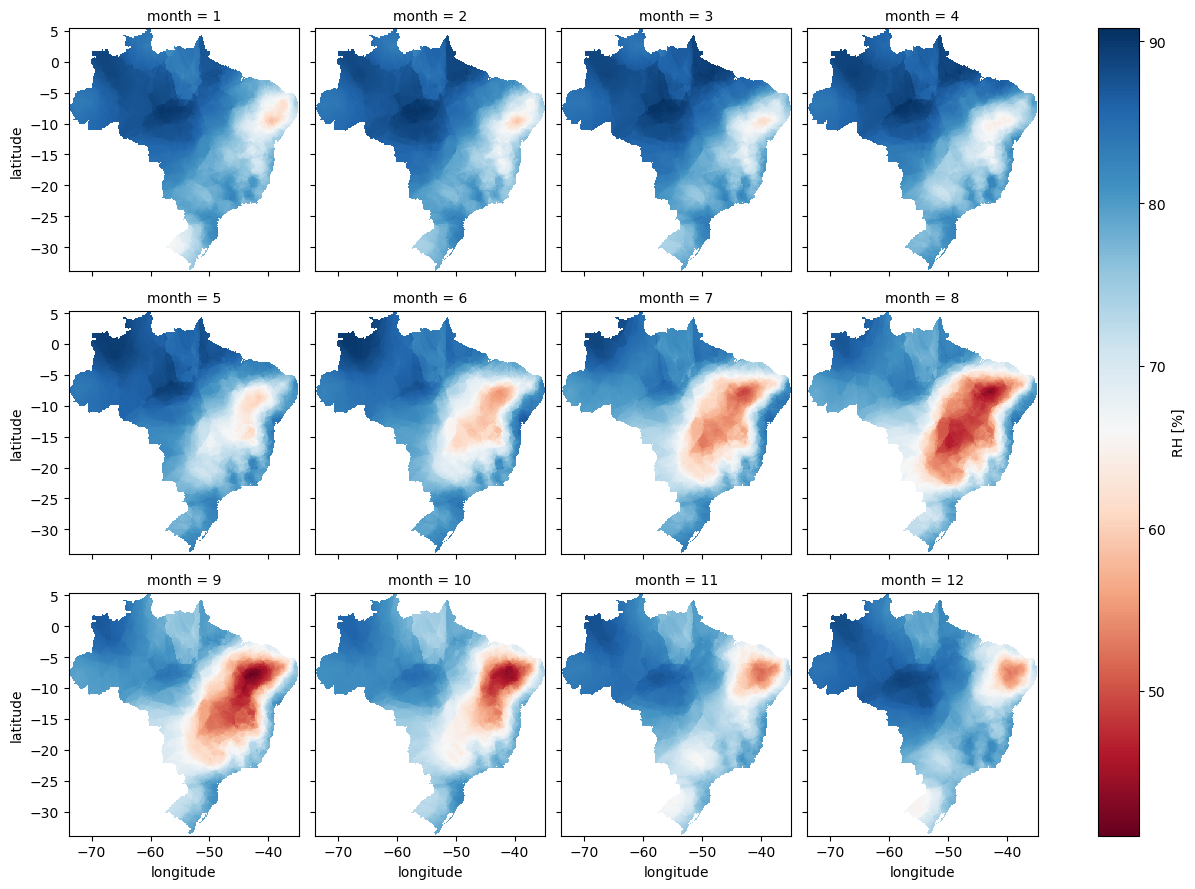

In [29]:
RH_mean_month.plot(x='longitude', y='latitude', col='month',
                   cmap='RdBu', col_wrap=4)

## Plotando a média mensal da ET0 para algumas cidades

Pegando variável

In [31]:
var = xr.open_mfdataset(path_var + 'ETo*.nc')["ETo"]


start_date, end_date = '2000-01-01', '2009-12-31'
var = var.sel(time=slice(start_date, end_date))


Cidades e coordenadas

In [36]:
cityInformation = {
    'Santa Maria-RS': [-29.7, -53.7],
    'Manaus-AM': [-3., -60.],
    'Petrolina-PE': [-9.4, -40.5],
    # 'Alegre-ES': [-20.7, -41.5]
}
pd.DataFrame(cityInformation, index=['lat', 'lon'])

Santa Maria-RS  Manaus-AM  Petrolina-PE
lat           -29.7       -3.0          -9.4
lon           -53.7      -60.0         -40.5

Calculando a média mensal

In [37]:
varMean = var.resample(time='M').mean('time')
varMean

<xarray.DataArray 'ETo' (time: 120, latitude: 393, longitude: 391)>
dask.array<stack, shape=(120, 393, 391), dtype=float32, chunksize=(1, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
  * time       (time) datetime64[ns] 2000-01-31 2000-02-29 ... 2009-12-31
Attributes:
    units:          mm
    standard_name:  ETo
    _ChunkSizes:    [7305  393  391]

Plotando

Santa Maria-RS
Manaus-AM
Petrolina-PE


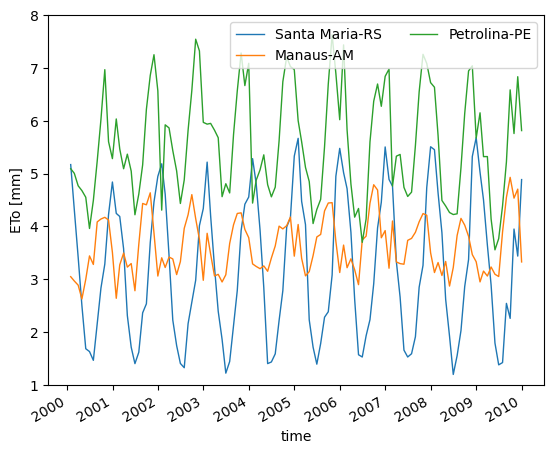

In [38]:
for city, cityCoord in cityInformation.items():
    print(city)
    varMean.sel(latitude=cityCoord[0], longitude=cityCoord[1],
                method='nearest').plot(label=city, linewidth=1)

plt.ylim(1, 8)
plt.title('')
plt.legend(ncol=2)

## Plotar média temporal com intervalo de confiança

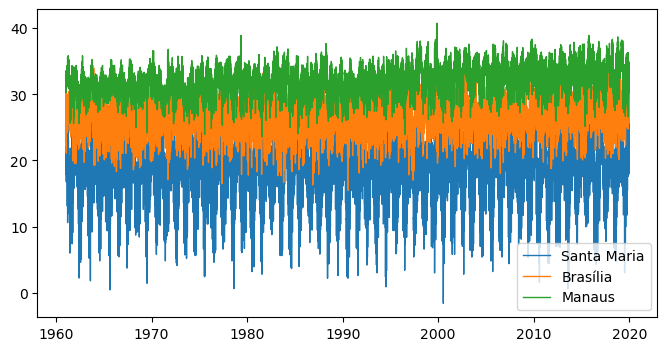

In [42]:
# definição da variável, cidades, localizações e período
var2get = "Tmax" #"RH"

cidades = [["Santa Maria", "Brasília", "Manaus"]]
lat, lon = [-28.3, -15.78, 3.1], [-49.94, -47.92, -60]

# Período para gerar as médias
day_first, day_last = '1961-01-01', '2019-12-31' 

# pegando os dados para o período
var = xr.open_mfdataset(path_var + var2get + '*.nc')[var2get]
var = var.sel(time=slice(day_first, day_last))

# pegando os dados da posições lat e lon
var_pos = var.sel(longitude=xr.DataArray(lon, dims='z'),
                    latitude=xr.DataArray(lat, dims='z'),  method='nearest')

# plotando diária
plt.figure(figsize=(8,4))
for n in range(len(lat)):
    plt.plot(var_pos.time, var_pos.isel(z=n), label=cidades[0][n], linewidth=1)
               
plt.legend()

Cidade  DOY  Mês   Ano       Tmax
0     Santa Maria    1    1  1961  19.066406
1     Santa Maria    2    1  1961  19.574219
2     Santa Maria    3    1  1961  21.363281
3     Santa Maria    4    1  1961  18.605469
4     Santa Maria    5    1  1961  19.210938
...           ...  ...  ...   ...        ...
9856       Manaus  361   12  1969  28.210938
9857       Manaus  362   12  1969  28.164062
9858       Manaus  363   12  1969  27.695312
9859       Manaus  364   12  1969  26.359375
9860       Manaus  365   12  1969  25.953125

[9861 rows x 5 columns]

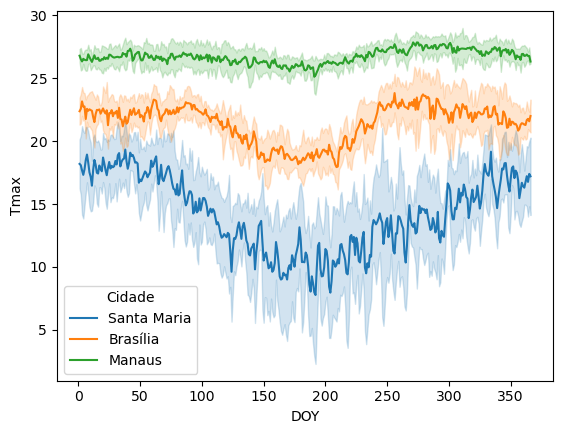

In [48]:
# organizando os dados para o DataFrame
doy = np.tile(var_pos.time.dt.dayofyear, len(lat))
mes = np.tile(var_pos.time.dt.month, len(lat))
ano = np.tile(var_pos.time.dt.year, len(lat))
var2df = var_pos.values.T.flatten()
cidades2df = np.tile(cidades, 
                     (len(var_pos.time.dt.dayofyear), 1)).T.flatten()

# gerando o DataFrame
df = pd.DataFrame(cidades2df, columns=["Cidade"])
df["DOY"] = doy
df["Mês"] = mes
df["Ano"] = ano
df[var2get] = var2df

# sns.lineplot(x="Mês", y=var2get, hue="Cidade", data=df)
sns.lineplot(x="DOY", y=var2get, hue="Cidade", data=df, errorbar=('sd', 1))
df

## Temperatura média intervalo de confiança

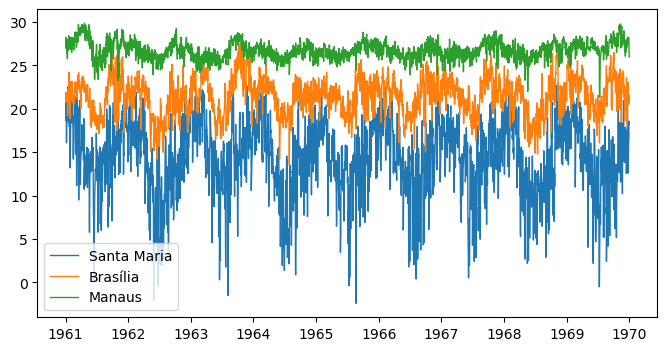

In [44]:
cidades = [["Santa Maria", "Brasília", "Manaus"]]
lat, lon = [-28.3, -15.78, 3.1], [-49.94, -47.92, -60]

# Período para gerar as médias
day_first, day_last = '1961-01-01', '1969-12-31' 

# pegando os dados para o período
tmax = xr.open_mfdataset(path_var + 'Tmax*.nc')["Tmax"].sel(time=slice(day_first, day_last))
tmin = xr.open_mfdataset(path_var + 'Tmin*.nc')["Tmin"].sel(time=slice(day_first, day_last))

tmean = (tmax + tmin)/2
# pegando os dados da posições lat e lon
var_pos = tmean.sel(longitude=xr.DataArray(lon, dims='z'),
                    latitude=xr.DataArray(lat, dims='z'),  method='nearest')

# plotando diária
plt.figure(figsize=(8,4))
for n in range(len(lat)):
    plt.plot(var_pos.time, var_pos.isel(z=n), label=cidades[0][n], linewidth=1)
               
plt.legend()

<AxesSubplot:xlabel='DOY', ylabel='Tmean'>

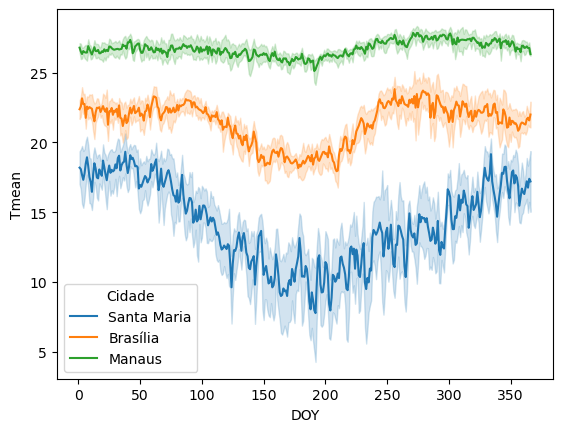

In [30]:
# organizando os dados para o DataFrame
doy = np.tile(var_pos.time.dt.dayofyear, len(lat))
mes = np.tile(var_pos.time.dt.month, len(lat))
ano = np.tile(var_pos.time.dt.year, len(lat))
var2df = var_pos.values.T.flatten()
cidades2df = np.tile(cidades, (len(var_pos.time.dt.dayofyear), 1)).T.flatten()

# gerando o DataFrame
df = pd.DataFrame(cidades2df, columns=["Cidade"])
df["DOY"] = doy
df["Mês"] = mes
df["Ano"] = ano
df["Tmean"] = var2df

# sns.lineplot(x="Mês", y=var2get, hue="Cidade", data=df)
sns.lineplot(x="DOY", y="Tmean", hue="Cidade", data=df)

## Visuzalizando dados de controle no tempo

Para todas as variaveis existem dois controles

(*i*) a distancia do centro da celula a estacao mais proxima (**dist_nearest**) e;

(*ii*) o numero de estacoes/pluviometros dentro da celula (**count**). 

Serão plotados os controles da grade precipitacão em duas localidades, Sorriso-MT e Campinas-SP (na verdade é da celula mais proxima a estas cidades).

Lendo dados

In [31]:
ds = xr.open_mfdataset(path_control + 'pr_Control*.nc')
dist_nearest = ds['dist_nearest']
count = ds['count']
ds

<xarray.Dataset>
Dimensions:       (time: 22645, latitude: 393, longitude: 391)
Coordinates:
  * time          (time) datetime64[ns] 1961-01-01 1961-01-02 ... 2022-12-31
  * latitude      (latitude) float32 -33.85 -33.75 -33.65 ... 5.15 5.25 5.35
  * longitude     (longitude) float32 -73.85 -73.75 -73.65 ... -34.95 -34.85
Data variables:
    dist_nearest  (time, latitude, longitude) float32 dask.array<chunksize=(7305, 393, 391), meta=np.ndarray>
    count         (time, latitude, longitude) float32 dask.array<chunksize=(7305, 393, 391), meta=np.ndarray>
Attributes:
    title:                Brazilian Daily Weather Gridded Data (1961-2020)
    institution:          Federal University of Espirito Santo; University of...
    institution_id:       UFES; UTEXAS
    history:              Created Tue May 31 11:39:29 2022
    temporal_resolution:  24-hourly
    contact:              alexandre.xavier@ufes.br; careyking@energy.utexas.e...
    main_code:            gerando_ncfiles_pr.py
    update_information:   https://sites.google.com/site/alexandrecandidoxavie...
    main_paper:           Xavier, A.C., Scanlon, B.R., King, C.W. and Alves, ...

Definindo posições

In [32]:
posicoes = {'Sorriso-MT': [-12.5, -55.7],
            'Santa Maria-RS': [-29.7, -53.8]}

Plotando distancia do pluviometro mais proximo, ao longo do tempo, que foi utilizado na interpolacao

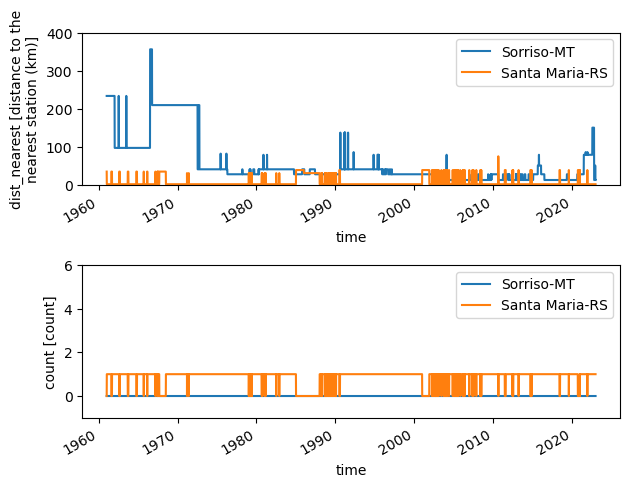

In [33]:
_, (ax1, ax2) = plt.subplots(2, 1)
for names, lat_lon in posicoes.items():
    dist_nearest.sel(latitude=lat_lon[0],
                     longitude=lat_lon[1],
                     method='nearest').plot(ax=ax1, label=names)

    # número de estações que contem na célula
    count.sel(latitude=lat_lon[0],
              longitude=lat_lon[1],
              method='nearest').plot(ax=ax2, label=names)

ax1.set_ylim(0, 400)
ax1.legend()
ax1.set_title('')
ax2.set_ylim(-1, 6)
ax2.legend()
ax2.set_title('')
plt.tight_layout()

## Diferença entre precipitação e ETo  

Calculo da diferenca sazonal entre a precipitacao e a ET0 para o Brasil utilizando os dados gradeados 
(periodo de 1980/01/01  a 2009/12/31)

Pegando variáveis

In [34]:
ETo = xr.open_mfdataset(path_var + 'ETo*.nc')
prec = xr.open_mfdataset(path_var + 'pr*.nc')

criando mascara para o continente e mar

<xarray.DataArray 'season' (time: 21762)>
array(['DJF', 'DJF', 'DJF', ..., 'JJA', 'JJA', 'JJA'], dtype='<U3')
Coordinates:
  * time     (time) datetime64[ns] 1961-01-01 1961-01-02 ... 2020-07-31

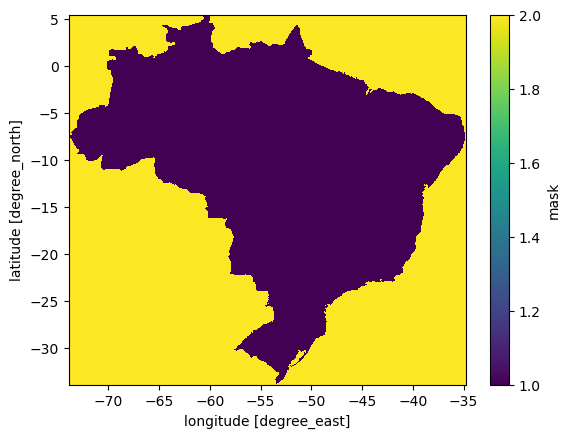

In [35]:
mask_ocean = 2 * np.ones(prec['pr'].shape[1:]) * np.isnan(prec['pr'].isel(time=0))
mask_land = 1 * np.ones(prec['pr'].shape[1:]) * ~np.isnan(prec['pr'].isel(time=0))
mask_array = mask_ocean + mask_land

# incorporando mascara em ETo
# ETo.coords['mask'] = (('latitude', 'longitude'), mask_array.values)
ETo.coords['mask'] = xr.DataArray(mask_array.values, dims=('latitude', 'longitude'))
ETo.mask.plot()
ETo.time.dt.season


Intervalo da seria histórica para os cálculos e reamostrando para a media mensal diaria

In [36]:
date_start, date_end = '2010-01-01', '2011-12-31' # '1980-01-01', '2009-12-31'

EToSlice = ETo['ETo'].loc[dict(time=slice(date_start, date_end))].resample(time='M').mean('time')
precSlice = prec['pr'].loc[dict(time=slice(date_start, date_end))].resample(time='M').mean('time')

# agrupando nas estacoes ('DJF', 'MAM', 'JJA', 'SON')
EToSeason = EToSlice.groupby('time.season').mean(dim='time')
precSeason = precSlice.groupby('time.season').mean(dim='time')

# calculando diferencas sazonais entre prec e ETo
diff = precSeason - EToSeason
diff

<xarray.DataArray (season: 4, latitude: 393, longitude: 391)>
dask.array<sub, shape=(4, 393, 391), dtype=float32, chunksize=(1, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
    mask       (latitude, longitude) float64 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0

Plotando

Text(0.5, 0.98, 'Diferença sazonal entre precipitação e ETo')

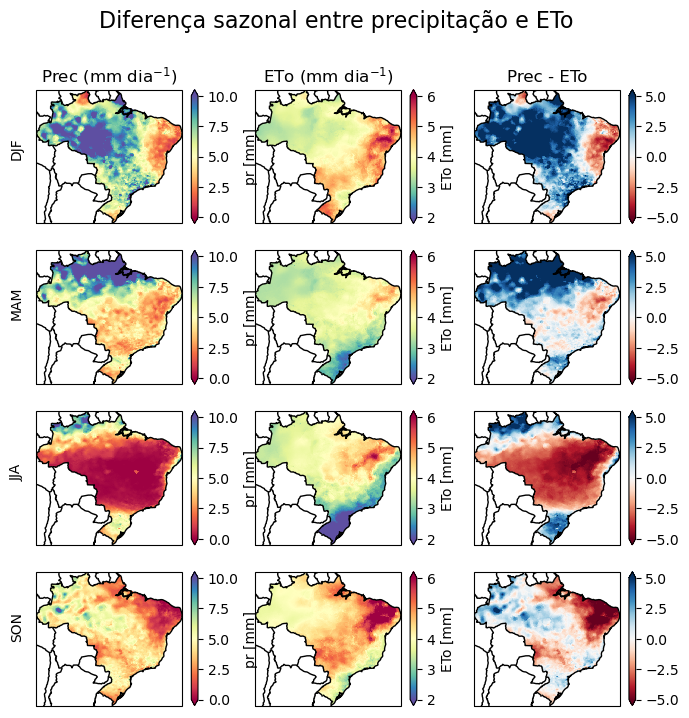

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=3,
                         figsize=(8, 8),
                         subplot_kw={'projection':ccrs.PlateCarree()})

for i, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    precSeason.where(ETo.mask == 1).sel(season=season).plot(
        ax=axes[i, 0], transform=ccrs.PlateCarree(), cmap='Spectral',
        vmin=0, vmax=10, extend='both',)

    EToSeason.where(ETo.mask == 1).sel(season=season).plot(
        ax=axes[i, 1],  transform=ccrs.PlateCarree(), cmap='Spectral_r',
        vmin=2, vmax=6, extend='both',)

    diff.where(ETo.mask == 1).sel(season=season).plot(
        ax=axes[i, 2],  transform=ccrs.PlateCarree(), cmap='RdBu',
        vmin=-5, vmax=5, extend='both',)

    axes[i, 0].text(-78, -15, season,
                    rotation='vertical',
                    rotation_mode='anchor',)
    axes[i, 1].set_ylabel('')
    axes[i, 2].set_ylabel('')

for n, ax in enumerate(axes.flat):
    # pdb.set_trace()
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    ax.set_title('')
    ax.coastlines()
    ax.add_feature(BORDERS)

axes[0, 0].set_title('Prec (mm dia$^{-1}$)')
axes[0, 1].set_title('ETo (mm dia$^{-1}$)')
axes[0, 2].set_title('Prec - ETo')

fig.suptitle('Diferença sazonal entre precipitação e ETo',
            fontsize=16, y=.98)

## Normal da temperatura media ([Tmax + Tmin]/2) do mês janeiro

Pegando Tmax e Tmin, calculando media mensais para o periodo

In [38]:
# definição das datas para calculo das normais
day_first, day_last = '1961-01-01', '1963-12-31' # '1961-01-01', '1990-12-31'

tmax = xr.open_mfdataset(path_var + 'Tmax*.nc').Tmax
tmax_month = tmax.sel(time=slice(day_first, day_last)).groupby('time.month').mean('time')

tmin = xr.open_mfdataset(path_var + 'Tmin*.nc').Tmin
tmin_month = tmin.sel(time=slice(day_first, day_last)).groupby('time.month').mean('time')

t_mean_month = ((tmax_month + tmin_month) / 2)
t_mean_month

<xarray.DataArray (month: 12, latitude: 393, longitude: 391)>
dask.array<truediv, shape=(12, 393, 391), dtype=float32, chunksize=(1, 393, 391), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -33.85 -33.75 -33.65 -33.55 ... 5.15 5.25 5.35
  * longitude  (longitude) float32 -73.85 -73.75 -73.65 ... -35.05 -34.95 -34.85
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

Plotando normal, mes de Janeiro

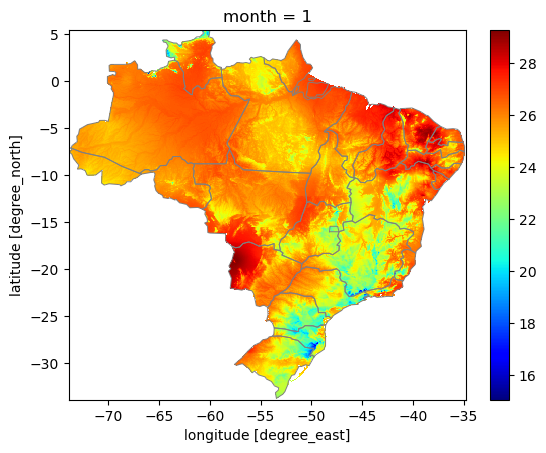

In [39]:
month = 1 # 1=janeiro, 2=fevereiro, .... 12=dezembro
_, ax = plt.subplots(1,1)
t_mean_month.sel(month=month).plot(ax=ax,cmap=plt.cm.jet)
limite2plot_plt(ax)

Plotando as medias para todos os meses

/tmp/ipykernel_35104/2869537228.py:5: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in p.axes.flat:


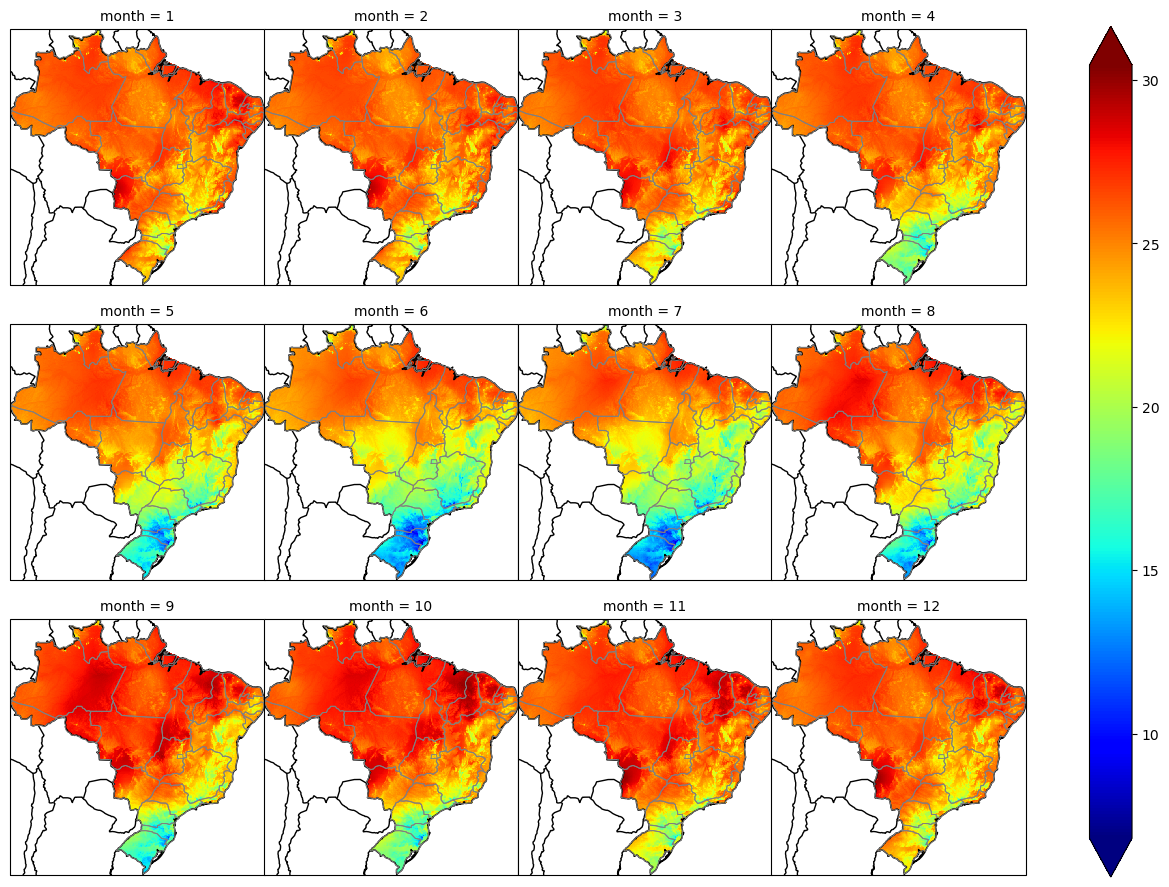

In [40]:
p = t_mean_month.plot(transform=ccrs.PlateCarree(), cmap=plt.cm.jet, 
                      col='month', col_wrap=4,
                      subplot_kws={'projection': ccrs.PlateCarree()}, extend='both')

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(BORDERS)
    limite2plot_plt(ax)

## Comportamento da temperatuta média anual em diferentes regioes do Brasil

In [41]:
# definição da dadas para calculos
day_first, day_last = '1961-01-01', '2019-12-31' #'1961-01-01', '2019-12-31'

# pegando Tmax e Tmin, v2.1 e calculando as suas respectivas medias anuais
tmax = xr.open_mfdataset(path_var + 'Tmax*.nc').Tmax
tmax_yearly = tmax.sel(time=slice(day_first, day_last)).resample(time='Y').mean('time')

tmin = xr.open_mfdataset(path_var + 'Tmin*.nc').Tmin
tmin_yearly = tmin.sel(time=slice(day_first, day_last)).resample(time='Y').mean('time')

# Temperatura anual
temp_mean_yearly = (tmax_yearly+tmin_yearly) / 2

Cálculos dos pesos das celulas de acordo com sua latitude

In [42]:
weights = np.cos(np.deg2rad(temp_mean_yearly.latitude))
weights.name = "weights"

In [43]:
# definindo regioes: cada linha tem as coordenadas limites da respectiva região na ordem:
# sul, sudeste, nordeste, centro-oeste, norte
names_regions = ['Sul', 'Sudeste', 'Nordeste', 'Centro-Oeste', 'Norte']
names_regions_abre = ['S', 'SE', 'NE', 'CO', 'N',]
regiao_lat = [[-34, -22],
              [-25.6, -13.8],
              [-18.6, -1],
              [-24.3, -7],
              [-12.7, 6]]

regiao_lon = [[-58, -47.2],
              [-51.5, -39],
              [-49, -34.4],
              [-62, -45.6],
              [-74, -46.3]]

## Extraindo dados anuais e plotando os limites das regiões

Sul
Sudeste
Nordeste
Centro-Oeste
Norte


year     t_mean region
0   1961.0  20.384335    Sul
1   1962.0  18.986124    Sul
2   1963.0  20.180061    Sul
3   1964.0  19.166435    Sul
4   1965.0  19.573282    Sul
..     ...        ...    ...
54  2015.0  27.562170  Norte
55  2016.0  27.556654  Norte
56  2017.0  27.231632  Norte
57  2018.0  26.992542  Norte
58  2019.0  27.286772  Norte

[295 rows x 3 columns]

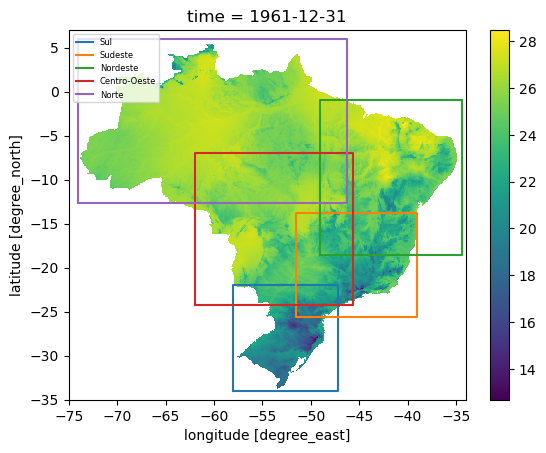

In [44]:
# figura regioes
fig, ax = plt.subplots(1)
temp_mean_yearly.isel(time=0).plot(ax=ax)

# calculation of the regions yearly Tmean
for n in range(len(names_regions)):
    print(names_regions[n])
    lat_min, lat_max = regiao_lat[n][0], regiao_lat[n][1]
    lon_min, lon_max = regiao_lon[n][0], regiao_lon[n][1]

    ax.plot([lon_min, lon_max, lon_max, lon_min, lon_min],
            [lat_min, lat_min, lat_max, lat_max, lat_min], label=names_regions[n])

    # creating a mask of the region
    mask = (lon_min < tmax_yearly.longitude) & (lon_max > tmax_yearly.longitude) & \
           (lat_min < tmax_yearly.latitude) &  (lat_max > tmax_yearly.latitude)
    # yearly tmean to Dataframe
    # inserindo o peso na regiao
    temp_mean_yearly_r = temp_mean_yearly.where(mask)
    temp_mean_yearly_w = temp_mean_yearly_r.weighted(weights)
    temp_mean_yearly_region_w = temp_mean_yearly_w.mean(['latitude', 'longitude']).values
    df_region = pd.DataFrame(np.c_[temp_mean_yearly_r.time.dt.year,
                                   temp_mean_yearly_region_w], columns=['year', 't_mean'])
    df_region['region'] = names_regions[n]
    if n == 0:
        df_all = df_region
    else:
        df_all = pd.concat([df_all, df_region])

ax.legend(loc=2, prop={'size': 6})
ax.set_xlim(-75, -34)
ax.set_ylim(-35, 7)
df_all

## Gráfico *simple linear regression* "year" versus "t_mean" para cada regiao

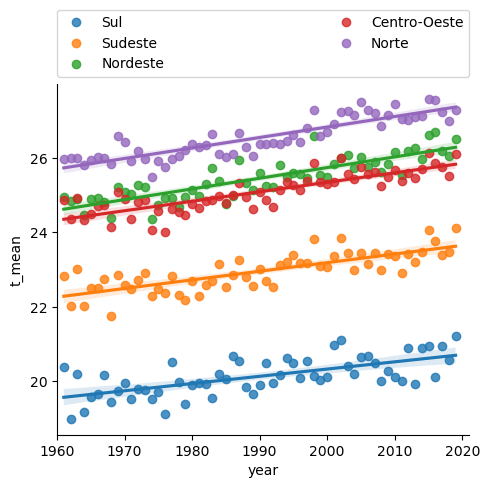

In [45]:
g = sns.lmplot(x='year', y="t_mean", hue="region", data=df_all, legend=False)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.)
plt.xlim(1960,2021)
plt.tight_layout()

# estatisticas por regiao na variavel "stat_region"
df_all['year_ano'] = df_all['year']
df_all['datas'] = df_all.index.values
df_all['name_legend'] = ''
stat_region = np.zeros((5,4))
for n in np.arange(5):
    x = df_all[df_all['region'] == names_regions[n]].year_ano.values
    y = df_all[df_all['region'] == names_regions[n]].t_mean.values
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    stat_region[n] = np.array([slope, r_value, p_value, std_err])



In [46]:
pd.DataFrame(stat_region, index=names_regions_abre,
            columns=["slope", "r_value", "p_value", "std_err"])

slope   r_value       p_value   std_err
S   0.019445  0.659647  1.330876e-08  0.002934
SE  0.023150  0.778989  3.729310e-13  0.002468
NE  0.028670  0.855059  6.754050e-18  0.002303
CO  0.025484  0.843294  5.279345e-17  0.002151
N   0.028153  0.877853  7.112052e-20  0.002034